In [141]:
import math
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [142]:
#Reading the file in which the values are saved, converting the Date into a panda Datetime format
appa_hours = pd.read_csv("../../exports/appa1.csv")
appa_hours = appa_hours.drop('Unnamed: 0', axis=1)
appa_hours.Time = pd.to_datetime(appa_hours.Time)

In [143]:
appa_hours.columns

Index(['Unnamed: 0.1', 'Time', 'ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2',
       'WO3_1', 'WO3_2', 'ZnOR_1_heatR', 'ZnOR_2_heatR', 'LaFeO3_1_heatR',
       'LaFeO3_2_heatR', 'WO3_1_heatR', 'WO3_2_heatR', 'ZnOR_1_heatV',
       'ZnOR_2_heatV', 'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 'WO3_1_heatV',
       'WO3_2_heatV', 'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_Age', 'ZnOR_2_Age', 'LaFeO3_1_Age', 'LaFeO3_2_Age', 'WO3_1_Age',
       'WO3_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday', 'cos_weekday',
       'sin_month', 'cos_month', 'sin_ordate', 'cos_ordate', 'year', 'UV',
       'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 'PM10', 'NO2', 'SO2',
       'O3', 'CO'],
      dtype='object')

In [144]:
appa_hours = appa_hours[
    (appa_hours.Time > "2021-05-01")
    & (appa_hours.Time < "2021-11-15")
]

#TODO: Mettere i grafici dei valori con alte correlazione insieme ed esaminare pezzo per pezzo

In [145]:
appa_hours.loc[appa_hours.LaFeO3_1 > 15*10**6, 'LaFeO3_1'] = np.nan
appa_hours = appa_hours.dropna()

In [146]:
fig = px.line(x=appa_hours.Time, y=appa_hours.WO3_1)
fig.add_scatter(x=appa_hours.Time,  y=appa_hours.WO3_2, mode='lines', opacity=0.5)
fig.show()

In [147]:
# appa_hours = appa_hours[
#     (appa_hours.Time > "2021-05-01")
#     & (appa_hours.Time < "2021-06-29")
# ]

In [149]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
    'ZnOR_1_heatV', 'ZnOR_2_heatV', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'WO3_1_heatV','WO3_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
    'ZnOR_1_Age', 'ZnOR_2_Age', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age', 
    'WO3_1_Age', 'WO3_2_Age', 
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate',  
    'UV', 'Rain', 
    'Wind_Speed',
    'NO2', 'O3', 'CO'
]]

In [148]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR', 
    'CO'
]]

In [12]:
#selecting all the values we need to train and test the model
appa_hours = appa_hours[[
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'NO2', 'O3', 'CO'
]]

# Random Forest

In [152]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
    'ZnOR_1_heatR', 'ZnOR_2_heatR', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR', 
    'WO3_1_heatR', 'WO3_2_heatR'
]

#Selecting the target
outs = ['CO']

In [14]:
#Selecting the features
cols = [
    'ZnOR_1', 'ZnOR_2', 
    'LaFeO3_1', 'LaFeO3_2',
    'WO3_1', 'WO3_2', 
]



#Selecting the target
outs = ['NO2', 'O3', 'CO']
#outs = ['O3',]

In [153]:
#splitting the values in training and test
vsplit = round(len(appa_hours) * 0.2)

X_train = appa_hours.iloc[vsplit:][cols]
X_test = appa_hours.iloc[:vsplit][cols]

Y_train = appa_hours.iloc[vsplit:][outs]
Y_test = appa_hours.iloc[:vsplit][outs]


In [154]:
rf_random = pickle.load(open('../../../models/model_weather1_ultimate(2).sav', 'rb'))

In [156]:
bla = rf_random.best_estimator_

In [157]:
rf_random.feature_names_in_

array(['ZnOR_1', 'ZnOR_2', 'LaFeO3_1', 'LaFeO3_2', 'WO3_1', 'WO3_2',
       'ZnOR_1_heatR', 'ZnOR_2_heatR', 'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
       'WO3_1_heatR', 'WO3_2_heatR', 'ZnOR_1_heatV', 'ZnOR_2_heatV',
       'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 'WO3_1_heatV', 'WO3_2_heatV',
       'Temperature', 'Relative_Humidity', 'Pressure', 'VOC',
       'ZnOR_1_Age', 'ZnOR_2_Age', 'LaFeO3_1_Age', 'LaFeO3_2_Age',
       'WO3_1_Age', 'WO3_2_Age', 'sin_hour', 'cos_hour', 'sin_weekday',
       'cos_weekday', 'sin_month', 'cos_month', 'sin_ordate',
       'cos_ordate', 'year', 'UV', 'Rain', 'Wind_Speed', 'sin_wind',
       'cos_wind'], dtype=object)

In [158]:
bla.fit(X_train, Y_train)

C:\Users\londe\AppData\Local\Temp\ipykernel_22476\247355885.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=64, max_features='sqrt', min_samples_leaf=20,
                      min_samples_split=12)

In [159]:
bla.score(X_train, Y_train), bla.score(X_test, Y_test)

(0.7350063635839902, -0.7168691774469911)

In [160]:
bla.feature_importances_,

(array([0.1844192 , 0.14827739, 0.04899134, 0.03999709, 0.10751429,
        0.03770958, 0.09830856, 0.08615196, 0.03248631, 0.03092065,
        0.08683865, 0.098385  ]),)

<AxesSubplot:xlabel='feature'>

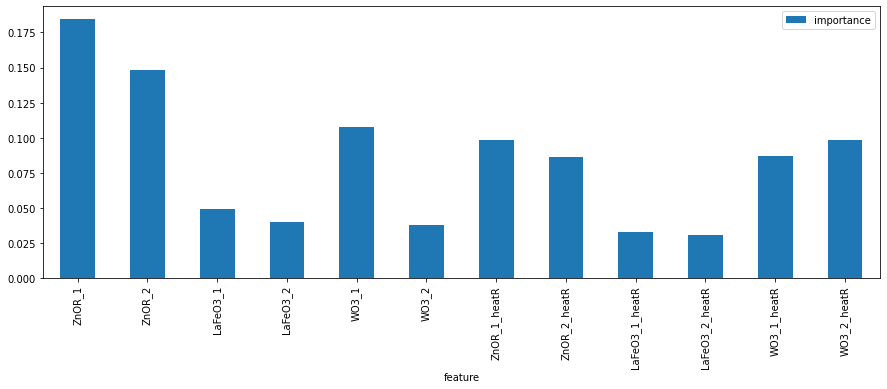

In [161]:
pd.DataFrame({"importance": bla.feature_importances_, "feature": X_train.columns}).plot.bar("feature", "importance", figsize=(15, 5))

In [114]:
appa_hours.corr().style.background_gradient(cmap='coolwarm')

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,WO3_1_heatR,WO3_2_heatR,VOC,NO2,O3,CO
ZnOR_1,1.000000,0.911131,-0.670022,-0.671716,0.568933,0.914823,0.000815,0.014298,0.003931,-0.009982,0.012658,0.003731,0.210286,-0.488717,0.678764,-0.356231
ZnOR_2,0.911131,1.000000,-0.645993,-0.637746,0.677442,0.831028,0.144280,-0.011100,-0.216828,-0.196589,-0.157825,-0.150825,0.309551,-0.447097,0.667088,-0.339201
LaFeO3_1,-0.670022,-0.645993,1.000000,0.993122,-0.605462,-0.608467,0.371616,0.496515,0.475504,0.500030,0.509205,0.523391,-0.358035,0.498216,-0.732835,0.506285
LaFeO3_2,-0.671716,-0.637746,0.993122,1.000000,-0.592815,-0.613318,0.363470,0.482958,0.462215,0.486585,0.492675,0.507330,-0.350682,0.493762,-0.726695,0.503363
WO3_1,0.568933,0.677442,-0.605462,-0.592815,1.000000,0.666762,-0.137774,-0.370645,-0.552211,-0.547303,-0.488195,-0.479489,0.706696,-0.407955,0.748143,-0.373101
WO3_2,0.914823,0.831028,-0.608467,-0.613318,0.666762,1.000000,-0.047166,-0.044801,-0.055129,-0.074459,-0.042151,-0.051114,0.338683,-0.431457,0.737679,-0.307530
ZnOR_1_heatR,0.000815,0.144280,0.371616,0.363470,-0.137774,-0.047166,1.000000,0.866998,0.383920,0.503214,0.554305,0.595976,-0.135871,0.347079,-0.423298,0.402218
ZnOR_2_heatR,0.014298,-0.011100,0.496515,0.482958,-0.370645,-0.044801,0.866998,1.000000,0.789450,0.861194,0.893998,0.914871,-0.297923,0.382953,-0.539604,0.470916
LaFeO3_1_heatR,0.003931,-0.216828,0.475504,0.462215,-0.552211,-0.055129,0.383920,0.789450,1.000000,0.989600,0.969831,0.957345,-0.400214,0.284596,-0.484253,0.388528
LaFeO3_2_heatR,-0.009982,-0.196589,0.500030,0.486585,-0.547303,-0.074459,0.503214,0.861194,0.989600,1.000000,0.982278,0.976430,-0.395206,0.313552,-0.522058,0.417833


In [115]:
appa_hours.corr().style.background_gradient(cmap='coolwarm')

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,WO3_1_heatR,WO3_2_heatR,VOC,NO2,O3,CO
ZnOR_1,1.000000,0.911131,-0.670022,-0.671716,0.568933,0.914823,0.000815,0.014298,0.003931,-0.009982,0.012658,0.003731,0.210286,-0.488717,0.678764,-0.356231
ZnOR_2,0.911131,1.000000,-0.645993,-0.637746,0.677442,0.831028,0.144280,-0.011100,-0.216828,-0.196589,-0.157825,-0.150825,0.309551,-0.447097,0.667088,-0.339201
LaFeO3_1,-0.670022,-0.645993,1.000000,0.993122,-0.605462,-0.608467,0.371616,0.496515,0.475504,0.500030,0.509205,0.523391,-0.358035,0.498216,-0.732835,0.506285
LaFeO3_2,-0.671716,-0.637746,0.993122,1.000000,-0.592815,-0.613318,0.363470,0.482958,0.462215,0.486585,0.492675,0.507330,-0.350682,0.493762,-0.726695,0.503363
WO3_1,0.568933,0.677442,-0.605462,-0.592815,1.000000,0.666762,-0.137774,-0.370645,-0.552211,-0.547303,-0.488195,-0.479489,0.706696,-0.407955,0.748143,-0.373101
WO3_2,0.914823,0.831028,-0.608467,-0.613318,0.666762,1.000000,-0.047166,-0.044801,-0.055129,-0.074459,-0.042151,-0.051114,0.338683,-0.431457,0.737679,-0.307530
ZnOR_1_heatR,0.000815,0.144280,0.371616,0.363470,-0.137774,-0.047166,1.000000,0.866998,0.383920,0.503214,0.554305,0.595976,-0.135871,0.347079,-0.423298,0.402218
ZnOR_2_heatR,0.014298,-0.011100,0.496515,0.482958,-0.370645,-0.044801,0.866998,1.000000,0.789450,0.861194,0.893998,0.914871,-0.297923,0.382953,-0.539604,0.470916
LaFeO3_1_heatR,0.003931,-0.216828,0.475504,0.462215,-0.552211,-0.055129,0.383920,0.789450,1.000000,0.989600,0.969831,0.957345,-0.400214,0.284596,-0.484253,0.388528
LaFeO3_2_heatR,-0.009982,-0.196589,0.500030,0.486585,-0.547303,-0.074459,0.503214,0.861194,0.989600,1.000000,0.982278,0.976430,-0.395206,0.313552,-0.522058,0.417833


C:\Users\londe\AppData\Local\Temp\ipykernel_22476\4003145675.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



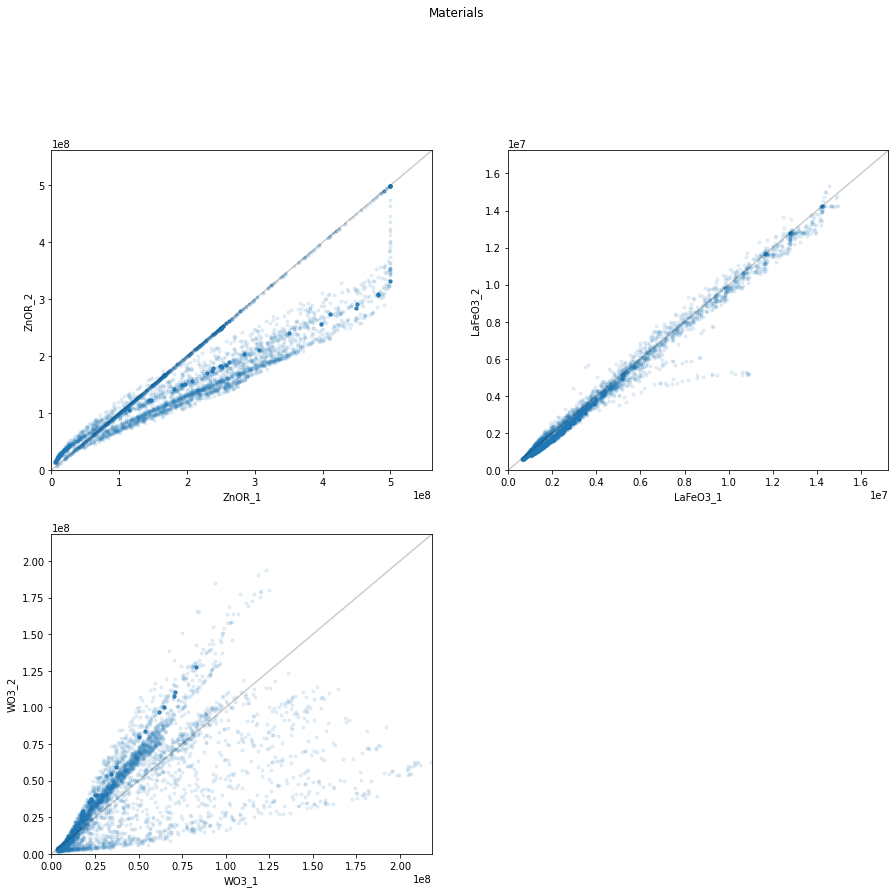

In [162]:
materials = [('ZnOR_1', 'ZnOR_2'), ('LaFeO3_1', 'LaFeO3_2'), ('WO3_1', 'WO3_2')]

fig = plt.figure(figsize=(15, 20))
fig.suptitle('Materials')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, material in enumerate(materials):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(appa_hours[material[0]], appa_hours[material[1]], marker=".", alpha=0.1)
    ax.set_xlabel(material[0])
    ax.set_ylabel(material[1])
    ax.set_xlim(0, appa_hours[material[1]].max()*9/8)
    ax.set_ylim(0, appa_hours[material[1]].max()*9/8)
    ax.plot([-100, appa_hours[material[1]].max()*10], [-100,  appa_hours[material[1]].max()*10], c="k", alpha=0.2)
    fig.add_subplot(ax)
fig.show()

C:\Users\londe\AppData\Local\Temp\ipykernel_22476\299864106.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



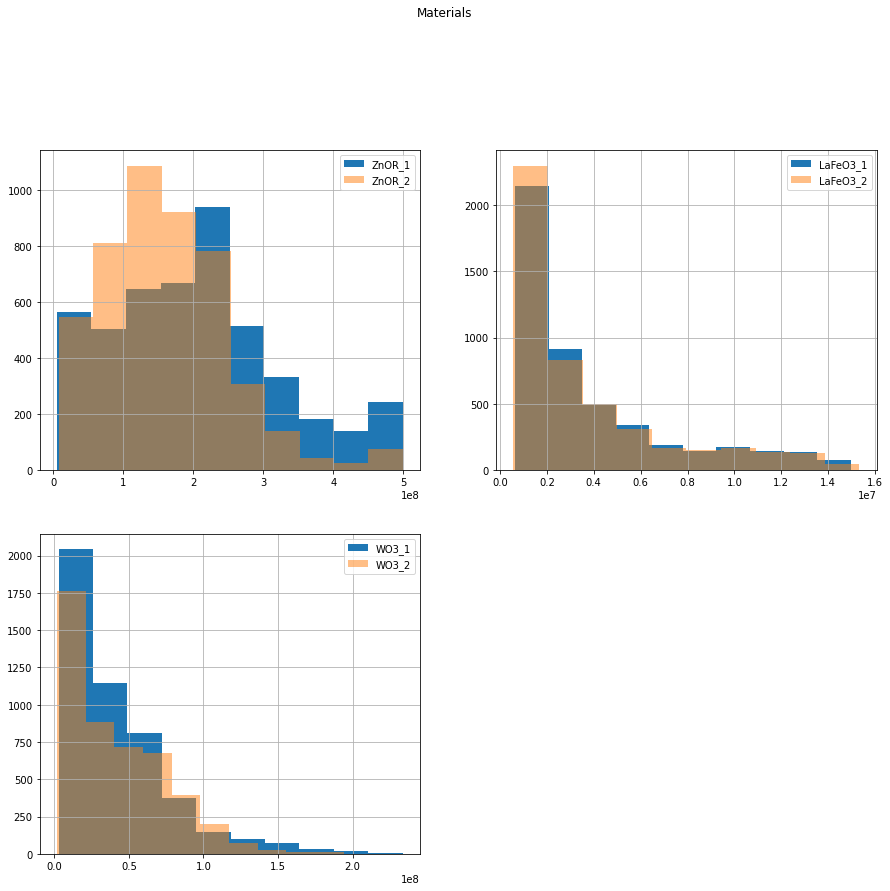

In [163]:
from cProfile import label


materials = [('ZnOR_1', 'ZnOR_2'), ('LaFeO3_1', 'LaFeO3_2'), ('WO3_1', 'WO3_2')]

fig = plt.figure(figsize=(15, 20))
fig.suptitle('Materials')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, material in enumerate(materials):
     ax = plt.Subplot(fig, outer[index])
     ax = appa_hours[material[0]].hist(ax=ax, label=material[0])
     ax = appa_hours[material[1]].hist(alpha=0.5, ax=ax, label=material[1])
     ax.legend()
     fig.add_subplot(ax)
fig.show()

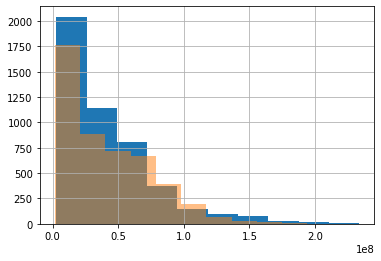

In [164]:
ax = appa_hours.WO3_1.hist()
ax = appa_hours.WO3_2.hist(alpha=0.5, ax=ax)

In [165]:
gases = Y_train.columns

fig = plt.figure(figsize=(15, 20))
fig.suptitle('Gases')
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
for index, gas in enumerate(gases):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(Y_train[gas], bla.predict(X_train)[:,index], marker=".", alpha=0.1, label=gas)
    ax.set_xlabel(f"Real")
    ax.set_ylabel(f"Predict")
    ax.set_xlim(0, Y_train[gas].max().max()*9/8)
    ax.set_ylim(0, Y_train[gas].max().max()*9/8)
    # ax.plot([-100, Y_train[gas].max()*10], [-100,  Y_train[gas].max()*10], c="k", alpha=0.2)
    ax.legend()
    fig.add_subplot(ax)
fig.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1080x1440 with 0 Axes>

In [129]:
Y_test.columns

Index(['CO'], dtype='object')

(0.0, 1.5)

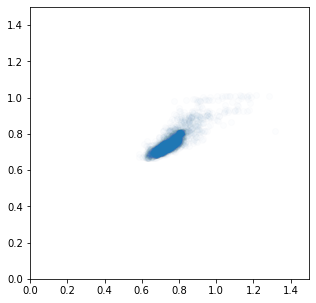

In [166]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(Y_train.CO, bla.predict(X_train), alpha=.01)
# ax.axhline(25)
# ax.axvline(25)
ax.set_xlim(0,1.5)
ax.set_ylim(0, 1.5)
# ax.plot([-100, 1000], [-100, 1000], c="k", alpha=0.5)


In [70]:
bad_pred_train_index = Y_train[(Y_train.O3 < 25) & (bla.predict(X_train)[:,1] < 25)].index
X_train.loc[bad_pred_train_index]

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,WO3_1_heatR,WO3_2_heatR,Temperature,Relative_Humidity,Pressure,VOC,sin_month,cos_month
4173,5.229419e+07,5.229419e+07,5.529943e+06,6.228372e+06,3.684051e+06,2.205475e+06,105.436667,103.150000,89.745000,88.603333,87.081667,88.983333,36.855000,28.576667,993.100000,3397.190000,-0.146302,0.502744
4602,4.633423e+07,4.040934e+07,6.002472e+06,6.868407e+06,5.785865e+06,3.240204e+06,102.025000,101.698333,90.791667,89.121667,90.323333,91.131667,43.468333,18.265000,990.870000,2308.997167,0.343997,0.394742
4672,7.092624e+07,5.588602e+07,8.251852e+06,8.746666e+06,7.486410e+06,4.598847e+06,102.091667,101.733333,90.746667,89.035000,90.528333,91.273333,42.501667,17.898333,990.316667,2540.888833,0.343997,0.394742
4673,5.732167e+07,4.831298e+07,8.809182e+06,9.377289e+06,5.951914e+06,3.666548e+06,102.086667,101.728333,90.718333,89.065000,90.521667,91.261667,42.350000,18.076667,990.508333,2444.039667,0.343997,0.394742
4674,3.133103e+07,3.229774e+07,1.025836e+07,1.064056e+07,4.138645e+06,2.685434e+06,102.081667,101.730000,90.743333,89.075000,90.516667,91.240000,42.425000,18.313333,990.846667,2197.176000,0.343997,0.394742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,1.981492e+07,3.737040e+07,1.341630e+07,1.280000e+07,5.750092e+06,5.674950e+06,107.570000,106.918333,91.930000,90.411667,102.096667,101.650000,35.701667,18.983333,991.600000,3604.340000,-0.523594,0.002317
7676,3.353598e+07,5.587252e+07,1.294222e+07,1.219879e+07,6.381692e+06,6.338555e+06,107.613333,106.926667,92.031667,90.441667,102.173333,101.686667,36.010000,18.778333,991.600000,3604.340000,-0.523594,0.002317
7677,4.169070e+07,6.662586e+07,1.251804e+07,1.171717e+07,6.260228e+06,6.251572e+06,107.630000,106.938333,92.038333,90.463333,102.178333,101.696667,36.558333,18.243333,991.600000,3604.340000,-0.523594,0.002317
7678,6.343043e+07,8.615475e+07,1.214061e+07,1.163636e+07,7.364535e+06,7.717147e+06,107.605000,106.896667,92.036667,90.453333,102.116667,101.685000,35.856667,18.785000,991.600000,3604.340000,-0.523594,0.002317


In [86]:
bad_pred_index = Y_test[(Y_test.O3 < 25) & (bla.predict(X_test) < 25)].index
X_test.loc[bad_pred_index]

ValueError: operands could not be broadcast together with shapes (948,) (948,3) 

NameError: name 'bad_pred_train_index' is not defined

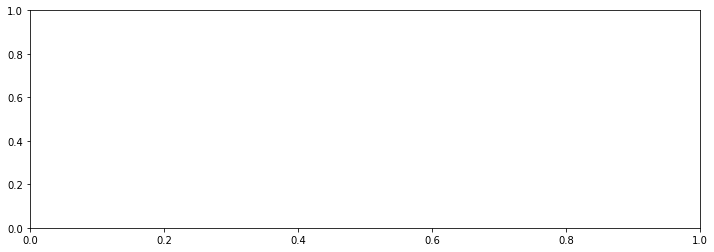

In [60]:
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 4))
    X_train.loc[~X_train.index.isin(bad_pred_train_index), col].plot(title=col, ax=ax)
    X_train.loc[bad_pred_train_index, col].plot(ax=ax)

    ax.axhline(X_train.loc[~X_train.index.isin(bad_pred_train_index), col].mean())
    ax.axhline(X_train.loc[bad_pred_train_index, col].mean(), c="C1")


NameError: name 'bad_pred_index' is not defined

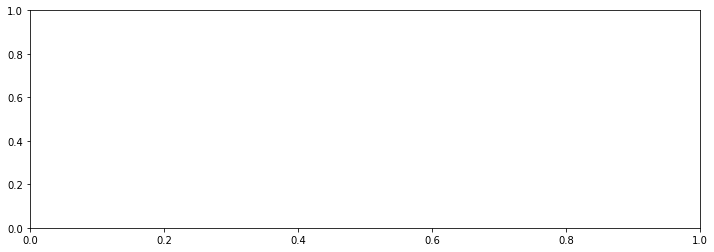

In [61]:
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 4))
    X_test.loc[~X_test.index.isin(bad_pred_index), col].plot(title=col, ax=ax)
    X_test.loc[bad_pred_index, col].plot(ax=ax)\

    ax.axhline(X_test.loc[~X_test.index.isin(bad_pred_index), col].mean())
    ax.axhline(X_test.loc[bad_pred_index, col].mean(), c="C1")


NameError: name 'bad_pred_train_index' is not defined

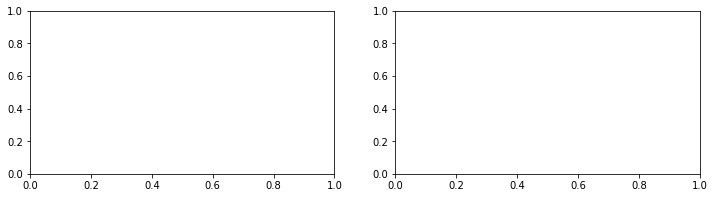

In [62]:
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    X_train.loc[bad_pred_train_index, col].plot.hist(ax=axes[0])
    X_test.loc[bad_pred_index, col].plot.hist(ax=axes[1])

In [63]:
X_train.describe()

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,WO3_1_heatR,WO3_2_heatR,Temperature,Relative_Humidity,Pressure,VOC,sin_month,cos_month
count,3.834000e+03,3.834000e+03,3.834000e+03,3.834000e+03,3.834000e+03,3.834000e+03,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000,3834.000000
mean,2.145587e+08,1.612259e+08,4.551177e+06,4.554843e+06,3.284372e+07,4.310744e+07,104.724497,104.014418,91.246302,89.689434,94.800122,95.009282,40.357997,18.868874,991.349758,3834.908774,0.030946,-0.104473
std,1.295890e+08,9.518078e+07,5.810807e+06,8.093641e+06,2.529066e+07,3.468928e+07,1.912282,1.897397,1.154405,1.067190,4.518149,3.743103,3.100789,5.724391,2.029048,1118.692992,0.345622,0.378017
min,7.185834e+05,6.544534e+05,6.444561e+05,5.755962e+05,3.203843e+06,1.711056e+06,87.162222,85.953333,83.648889,82.117778,78.946667,79.788889,32.853333,6.713333,981.013559,996.276000,-0.523594,-0.477067
25%,1.160266e+08,9.447309e+07,1.526786e+06,1.270050e+06,1.102840e+07,1.092308e+07,103.567083,102.905000,90.853333,89.182083,90.955417,91.656356,37.635417,14.352500,991.600000,3604.340000,-0.284849,-0.439337
50%,2.150016e+08,1.496819e+08,2.691750e+06,2.340856e+06,2.685368e+07,3.685289e+07,105.087387,104.044167,91.343333,89.726667,95.400833,95.297500,41.582331,18.451667,991.600000,3604.340000,-0.146302,-0.076184
75%,2.903729e+08,2.120750e+08,5.704348e+06,5.632500e+06,4.986993e+07,6.728764e+07,105.991667,105.456667,91.739583,90.161504,98.436667,97.973333,42.877500,22.660000,991.600000,3604.340000,0.343997,0.394742
max,4.990000e+08,4.990000e+08,1.216000e+08,1.280000e+08,1.359806e+08,1.941083e+08,107.841667,107.161667,105.698333,103.405000,102.328814,101.827119,46.313333,36.150847,998.883333,10996.164167,0.518027,0.502744


In [64]:
appa_hours

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_1_heatR,ZnOR_2_heatR,LaFeO3_1_heatR,LaFeO3_2_heatR,...,WO3_2_heatR,Temperature,Relative_Humidity,Pressure,VOC,sin_month,cos_month,NO2,O3,CO
2888,2.748574e+07,2.748574e+07,1.010758e+07,5.295414e+06,6.742857e+06,2.655831e+06,103.810000,101.655000,89.100000,87.940000,...,87.408333,39.095000,21.230000,986.876667,2379.417333,-0.502092,0.148525,12.0,49.0,0.696000
2889,1.974194e+07,1.974194e+07,1.058386e+07,5.306430e+06,5.065446e+06,2.342123e+06,103.941667,101.776667,89.240000,88.095000,...,87.498333,41.766667,18.680000,986.380000,2322.097167,-0.502092,0.148525,13.0,42.0,0.700000
2890,1.345830e+07,1.345830e+07,1.077354e+07,5.291025e+06,4.393868e+06,2.250969e+06,103.954237,101.786441,89.252542,88.120339,...,87.537288,42.054237,18.049153,986.345763,2319.518814,-0.502092,0.148525,13.0,32.0,0.694000
2891,9.973675e+06,9.973675e+06,1.084921e+07,5.249248e+06,3.975306e+06,2.144965e+06,104.005000,101.828333,89.290000,88.158333,...,87.541667,42.796667,17.050000,986.166667,2359.843333,-0.502092,0.148525,11.0,28.0,0.691333
2892,9.504600e+06,9.504600e+06,1.085845e+07,5.196105e+06,4.005057e+06,2.168709e+06,104.023333,101.826667,89.288333,88.146667,...,87.538333,42.591667,16.635000,985.988333,2428.643500,-0.502092,0.148525,13.0,27.0,0.696000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,1.981492e+07,3.737040e+07,1.341630e+07,1.280000e+07,5.750092e+06,5.674950e+06,107.570000,106.918333,91.930000,90.411667,...,101.650000,35.701667,18.983333,991.600000,3604.340000,-0.523594,0.002317,37.0,3.0,0.810000
7676,3.353598e+07,5.587252e+07,1.294222e+07,1.219879e+07,6.381692e+06,6.338555e+06,107.613333,106.926667,92.031667,90.441667,...,101.686667,36.010000,18.778333,991.600000,3604.340000,-0.523594,0.002317,33.0,5.0,0.759333
7677,4.169070e+07,6.662586e+07,1.251804e+07,1.171717e+07,6.260228e+06,6.251572e+06,107.630000,106.938333,92.038333,90.463333,...,101.696667,36.558333,18.243333,991.600000,3604.340000,-0.523594,0.002317,31.0,6.0,0.762000
7678,6.343043e+07,8.615475e+07,1.214061e+07,1.163636e+07,7.364535e+06,7.717147e+06,107.605000,106.896667,92.036667,90.453333,...,101.685000,35.856667,18.785000,991.600000,3604.340000,-0.523594,0.002317,28.0,6.0,0.780667


In [65]:
#Creating a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('results_weather1_ultimate(2).csv')

In [66]:
# Save the model itself in a .sav file
pickle.dump(rf_random, open('model_weather2_ultimate(2).sav', 'wb'))

## Results

In [67]:
rf_random = pickle.load(open("models/model_weather2_ultimate(2).sav", "rb"))
rf_random

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_weather2_ultimate(2).sav'

In [139]:
print("NO2: " + str(percentage(mean_absolute_error(Y_test.NO2 , rf_random.predict(X_test)[: ,0]), Y_test.NO2.describe())))
print("O3: " + str(percentage(mean_absolute_error(Y_test.O3 , rf_random.predict(X_test)[: ,1]), Y_test.NO2.describe())))
print("CO: " + str(percentage(mean_absolute_error(Y_test.CO , rf_random.predict(X_test)[: ,2]), Y_test.NO2.describe())))
print("Total: " + str(percentage(mean_absolute_error(Y_test , rf_random.predict(X_test)), Y_test.describe())))

NameError: name 'percentage' is not defined

In [87]:
Y_test.CO.describe()

count    948.000000
mean       0.704862
std        0.040531
min        0.571333
25%        0.680000
50%        0.703667
75%        0.729333
max        0.845333
Name: CO, dtype: float64

## Hyper Parameters Plots

In [92]:
ris = pd.DataFrame(rf_random.cv_results_)
ris.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_features', 'param_max_depth',
       'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

C:\Users\londe\AppData\Local\Temp\ipykernel_22476\2875355359.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



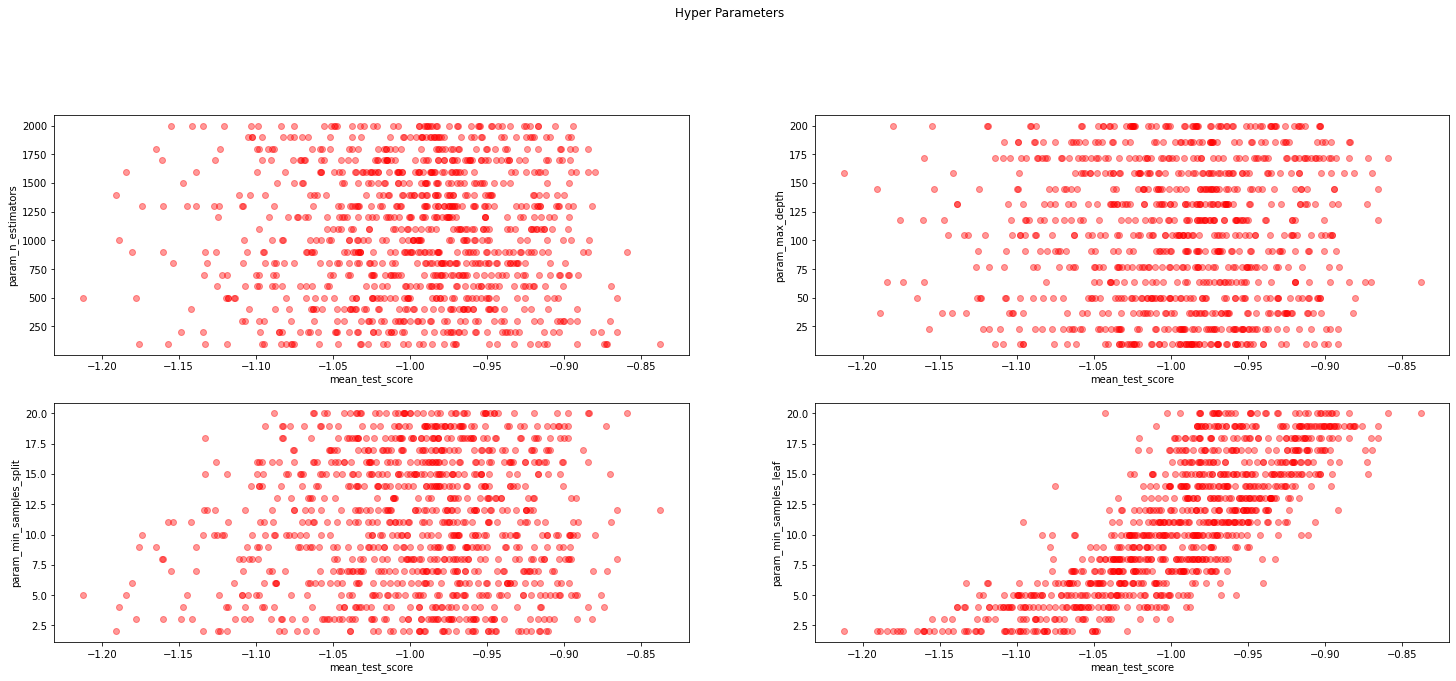

In [93]:
#Plotting the hyper-parameters in relation of mean test score
#Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
#On the X scale, the closer the values are to 0 the better they are

h_params = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

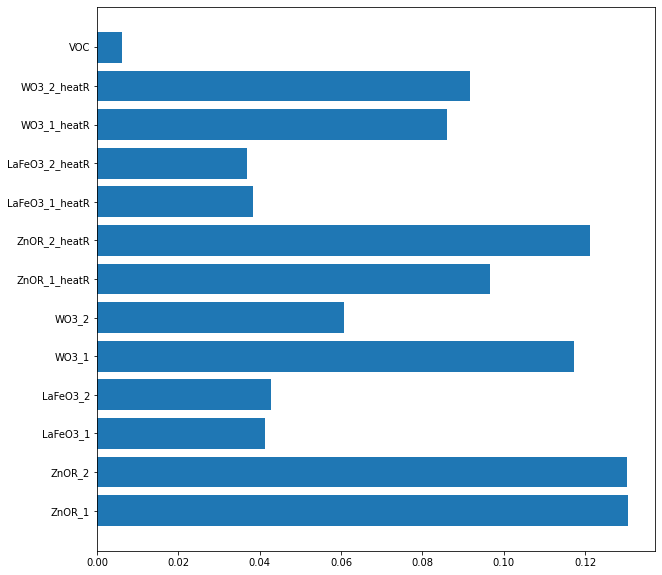

In [140]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()

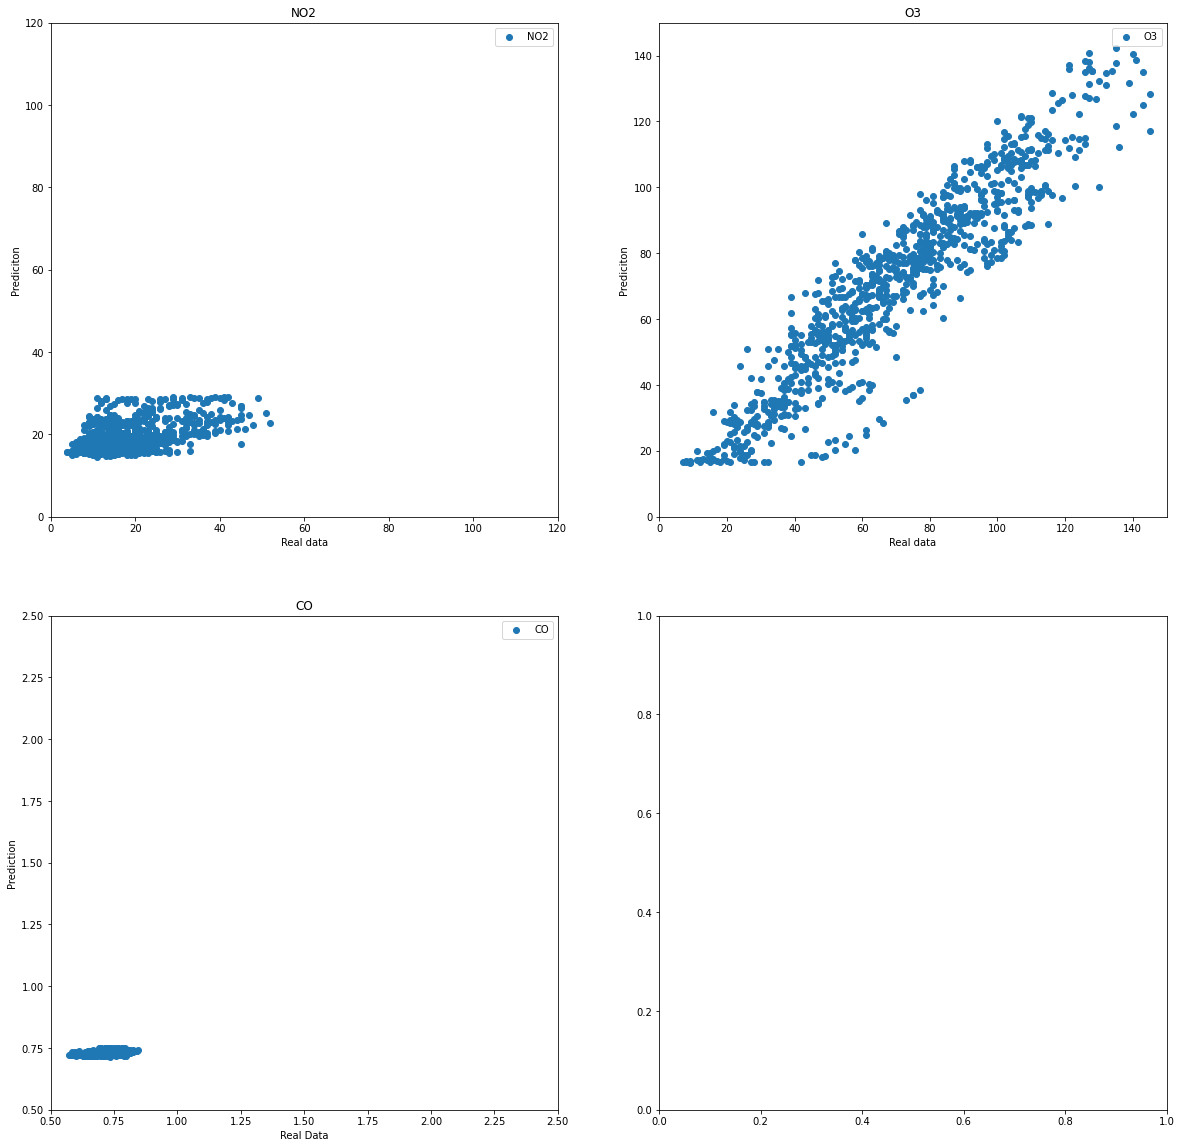

In [88]:
#Printing the charts to undersand better our predictions

fig,((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ax1.scatter(Y_test.NO2, rf_random.predict(X_test)[:, 0], label = "NO2")
ax2.scatter(Y_test.O3, rf_random.predict(X_test)[:, 1], label = "O3")
ax3.scatter(Y_test.CO, rf_random.predict(X_test)[:, 2], label = "CO")

ax1.set_xlim(0, 120)
ax1.set_ylim(0, 120)
ax2.set_xlim(0, 150)
ax2.set_ylim(0, 150)
ax3.set_xlim(0.5, 2.5)
ax3.set_ylim(0.5, 2.5)

ax1.set_title('NO2')
ax1.set_xlabel('Real data')
ax1.set_ylabel('Prediciton')
ax2.set_title('O3')
ax2.set_xlabel('Real data')
ax2.set_ylabel('Prediciton')
ax3.set_title('CO')
ax3.set_xlabel('Real Data')
ax3.set_ylabel('Prediction')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()